In [24]:
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import numpy as np 
import pandas as pd

In [26]:
dataset_path = "./dataset.csv"
full = True

df = pd.read_csv(
    dataset_path,
    # dtype is specified to prevent a DtypeWarning
    dtype={
        "full_query": str,
        "label": int,
        "statement_type": str,
        "query_template_id": str,
        "attack_payload": str,
        "attack_id": str,
        "attack_technique": str,
        "attack_desc": str,
        "split": str,
        "attack_status" : str,
        "attack_stage" : str,
    },
)


/tmp/nix-shell-85469-0/ipykernel_111084/1339210798.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


## Generic stats   


In [27]:
def display_counts_recon(df : pd.DataFrame):
    result = df.groupby('attack_id')['attack_stage'].value_counts().unstack(fill_value=0)
    print("Number of attack campaign: ", len(result))

    if full:
        with pd.option_context('display.max_rows', None, 
                        'display.max_columns', None,
                        'display.width', None,
                        'display.max_colwidth', None):
            display(result)
        
    else: 
        display(result)
        
_ = display_counts_recon(df)


Number of attack campaign:  270


attack_stage,exploit,recon
attack_id,,
boolean-0,0,3449
boolean-102,6322,327
boolean-108,6322,2339
boolean-114,21,886
boolean-12,0,3215
boolean-120,6322,153
boolean-126,21,165
boolean-132,6322,886
boolean-138,0,1065


In [28]:
def calculate_attack_success_rate(df):
    """
    Calculate success rate per attack technique based on unique attack IDs.
    Args:
        df: DataFrame with columns 'attack_id', 'attack_technique', 'attack_status'
    Returns:
        DataFrame with attack_technique, successful_attacks, success_rate, total_queries
    """
    # Get unique attack campaigns and determine success from attack_status
    unique = df.drop_duplicates('attack_id')
    unique = df.drop_duplicates('attack_id')
    unique['success'] = unique['attack_status'] == 'success'

    # Then we group by technique and provide successful count and success rate.
    result = unique.groupby('attack_technique')['success'].agg(['sum']).reset_index()
    result.columns = ['attack_technique', 'successful']
    
    # Add column counting total queries (rows) with each technique in original df
    query_counts = df.groupby('attack_technique').size().reset_index(name='total_queries')
    result = result.merge(query_counts, on='attack_technique')
    
    # Calculate success rate based on unique campaigns only
    campaign_counts = unique.groupby('attack_technique').size().reset_index(name='total_campaigns')
    result = result.merge(campaign_counts, on='attack_technique')
    result['success_rate'] = (result['successful'] / result['total_campaigns']).round(4)
    
    # Remove the total_campaigns column and reorder
    result = result[['attack_technique', 'successful', 'success_rate', 'total_queries']]
    
    display(result)

calculate_attack_success_rate(df)

/tmp/nix-shell-85469-0/ipykernel_111084/2380288621.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['success'] = unique['attack_status'] == 'success'


,attack_technique,successful,success_rate,total_queries
0,boolean,35,0.7778,203845
1,error,45,1.0000,40995
2,inline,5,0.1111,1389
3,stacked,30,0.6667,24659
4,time,39,0.8667,24713
5,union,15,0.3333,39591


In [29]:
def display_attack_normal_per_set(df : pd.DataFrame):
    df_train_atk = df[(df["label"] == 1) & (df["split"] == "train")]  
    df_train_normal = df[(df["label"] == 0) & (df["split"] == "train")]  

    df_test_atk = df[(df["label"] == 1) & (df["split"] == "test")]  
    df_test_normal = df[(df["label"] == 0) & (df["split"] == "test")]  

    print(f"Number of attacks in train: {df_train_atk.shape[0]}")
    print(f"Number of normal in train: {df_train_normal.shape[0]}")
    print(f"Number of attacks in test: {df_test_atk.shape[0]}")
    print(f"Number of normal in test: {df_test_normal.shape[0]}")

display_attack_normal_per_set(df)

Number of attacks in train: 0
Number of normal in train: 335306
Number of attacks in test: 335192
Number of normal in test: 3017390


In [ ]:
def display_ids_per_set(df: pd.DataFrame):
    df_train = df[df["split"] == "train"]
    df_test = df[df["split"] == "test"]

    tids_train = df_train["query_template_id"].unique()
    tids_test = df_test["query_template_id"].unique()
    tids_complement = set(tids_test) - set(tids_train)
    print(f"Template IDS in df train: {len(tids_train)}, {sorted(tids_train)}")
    print(f"Template IDS in df test:   {len(tids_test)}, {tids_test}")
    print(
        f"Template IDs in test but NOT in train: {len(tids_complement)}, {tids_complement}"
    )

    # Compute which template only have normal queries
    df_n = df.loc[df["label"] == 0,"query_template_id"].unique()
    df_a = df.loc[df["label"] == 1,"query_template_id"].unique()

    print(f"Templates IDs with no attacks: {set(df_n) - set(df_a)}")


display_ids_per_set(df)

Template IDS in df train: 65, ['airport-D1', 'airport-D2', 'airport-D3', 'airport-D4', 'airport-D5', 'airport-D6', 'airport-D7', 'airport-D8', 'airport-I1', 'airport-I10', 'airport-I2', 'airport-I3', 'airport-I4', 'airport-I5', 'airport-I6', 'airport-I7', 'airport-I8', 'airport-I9', 'airport-S1', 'airport-S10', 'airport-S11', 'airport-S12', 'airport-S13', 'airport-S14', 'airport-S15', 'airport-S16', 'airport-S17', 'airport-S18', 'airport-S19', 'airport-S2', 'airport-S20', 'airport-S21', 'airport-S22', 'airport-S23', 'airport-S3', 'airport-S4', 'airport-S5', 'airport-S6', 'airport-S7', 'airport-S8', 'airport-S9', 'airport-U1', 'airport-U10', 'airport-U2', 'airport-U3', 'airport-U4', 'airport-U5', 'airport-U6', 'airport-U7', 'airport-U8', 'airport-U9', 'airport-admin1', 'airport-admin10', 'airport-admin11', 'airport-admin12', 'airport-admin13', 'airport-admin14', 'airport-admin2', 'airport-admin3', 'airport-admin4', 'airport-admin5', 'airport-admin6', 'airport-admin7', 'airport-admin8', 

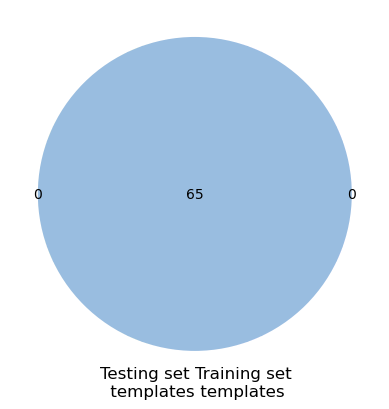

In [31]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def plot_templates_in_sets(df : pd.DataFrame): 
        
    df_train = df[df["split"] == "train"]
    df_test = df[df["split"] == "test"]
    
    tids_train = df_train["query_template_id"].unique()
    tids_test = df_test["query_template_id"].unique()
    venn2((set(tids_test),set(tids_train)), ("Testing set \n templates","Training set \n templates"),set_colors=("green","blue"))
    plt.show()

plot_templates_in_sets(df=df)

In [32]:
def _stmt_proportion(df: pd.DataFrame):
    return df['statement_type'].value_counts(normalize=True)

def display_ratio_per_stmt(df : pd.DataFrame):
    
    df_a = df[df["label"] == 1]
    df_n = df[df["label"] == 0]
    print(f"Proportion amongst normal: {_stmt_proportion(df=df_n)}")
    print(f"Proportion amongst attacks: {_stmt_proportion(df=df_a)}")
        
    df_train = df[df["split"] == "train"]
    df_test = df[df["split"] == "test"]
    print(f"Proportion amongst train: {_stmt_proportion(df=df_train)}")
    print(f"Proportion amongst test: {_stmt_proportion(df=df_test)}")

    dfntest = df_test[df_test["label"] == 0]

display_ratio_per_stmt(df=df)

Proportion amongst normal: statement_type
select    0.699681
insert    0.100230
update    0.099892
delete    0.090208
admin     0.009989
Name: proportion, dtype: float64
Proportion amongst attacks: statement_type
insert    0.366011
select    0.318805
update    0.224170
delete    0.091014
Name: proportion, dtype: float64
Proportion amongst train: statement_type
select    0.700163
insert    0.100553
update    0.099572
delete    0.089703
admin     0.010009
Name: proportion, dtype: float64
Proportion amongst test: statement_type
select    0.661553
insert    0.126770
update    0.112350
delete    0.090339
admin     0.008988
Name: proportion, dtype: float64


In [33]:
def print_stats_original(df : pd.DataFrame):
    df_og = df[df["template_split"] == "original"]
    df_chall = df[df["template_split"] == "challenging"]

    tids_og = df_og["query_template_id"].unique()
    tids_chall = df_chall["query_template_id"].unique()
    print(f"Template IDS in df original: {len(tids_og)}, {tids_og}")
    print(f"Template IDS in df challenging:   {len(tids_chall)}, {tids_chall}")
    
    print(f"Queries in original set: {len(df_og)}")
    df_a = df_og[df_og["label"] == 1]
    df_n = df_og[df_og["label"] == 0]
    print(f"Number of attacks in original: {df_a.shape[0]}")
    print(f"Number of normal in original: {df_n.shape[0]}")

    print(f"Queries in challenging set: {len(df_chall)}")
    df_a = df_chall[df_chall["label"] == 1]
    df_n = df_chall[df_chall["label"] == 0]
    print(f"Number of attacks in challenging: {df_a.shape[0]}")
    print(f"Number of normal in challenging: {df_n.shape[0]}")
print_stats_original(df=df)

KeyError: 'template_split'